In [1]:
# load in the libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt 
#import warnings 
#warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\senay\Desktop\AbsentData\hr_data.csv")
df.head()

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Departments,salary,Management
0,0.38,0.53,2.0,157,3.0,0.0,1,0,sales,low,31
1,0.80,0.86,5.0,262,6.0,0.0,1,0,sales,medium,71
2,0.11,0.88,7.0,272,4.0,0.0,1,0,sales,medium,8
3,0.72,0.87,5.0,223,5.0,0.0,1,0,sales,low,68
4,0.37,0.52,2.0,159,3.0,0.0,1,0,sales,low,48


In [3]:
df.columns = df.columns.str.strip()
df.head()

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Departments,salary,Management
0,0.38,0.53,2.0,157,3.0,0.0,1,0,sales,low,31
1,0.80,0.86,5.0,262,6.0,0.0,1,0,sales,medium,71
2,0.11,0.88,7.0,272,4.0,0.0,1,0,sales,medium,8
3,0.72,0.87,5.0,223,5.0,0.0,1,0,sales,low,68
4,0.37,0.52,2.0,159,3.0,0.0,1,0,sales,low,48


# EDA

<AxesSubplot: >

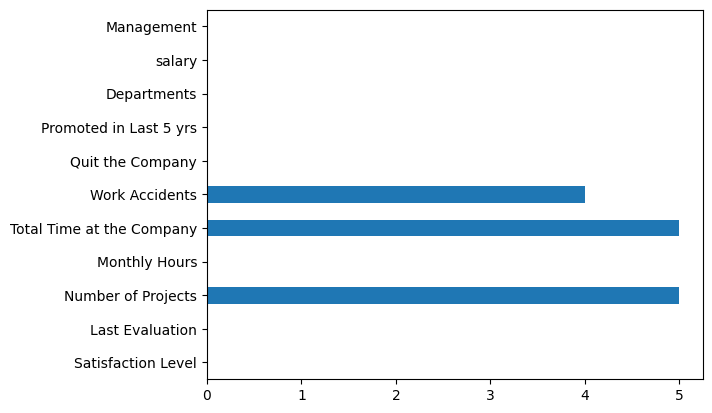

In [4]:
#logistic analysis will not run with missing values 
df.isnull().sum().plot(kind='barh')

In [5]:
#drop all the NA 
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Satisfaction Level         14999 non-null  float64
 1   Last Evaluation            14999 non-null  float64
 2   Number of Projects         14999 non-null  float64
 3   Monthly Hours              14999 non-null  int64  
 4   Total Time at the Company  14999 non-null  float64
 5   Work Accidents             14999 non-null  float64
 6   Quit the Company           14999 non-null  int64  
 7   Promoted in Last 5 yrs     14999 non-null  int64  
 8   Departments                14999 non-null  object 
 9   salary                     14999 non-null  object 
 10  Management                 14999 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 1.4+ MB


In [6]:
#how many people actually quit the dataset
df['Quit the Company'].value_counts()

Quit the Company
0    11428
1     3571
Name: count, dtype: int64

In [7]:
#who has a good salary
pd.crosstab(df['salary'], df['Departments'])

Departments,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147


In [8]:
#who has a good salary
pd.crosstab(df['salary'], df['Departments'], normalize = 'columns')

Departments,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,0.067645,0.064803,0.096480,0.060893,0.357143,0.093240,0.075388,0.064976,0.063257,0.073897
low,0.496333,0.462516,0.466754,0.453315,0.285714,0.468531,0.500000,0.507005,0.514132,0.504412
medium,0.436023,0.472681,0.436767,0.485792,0.357143,0.438228,0.424612,0.428019,0.422611,0.421691


<AxesSubplot: xlabel='Satisfaction Level', ylabel='salary'>

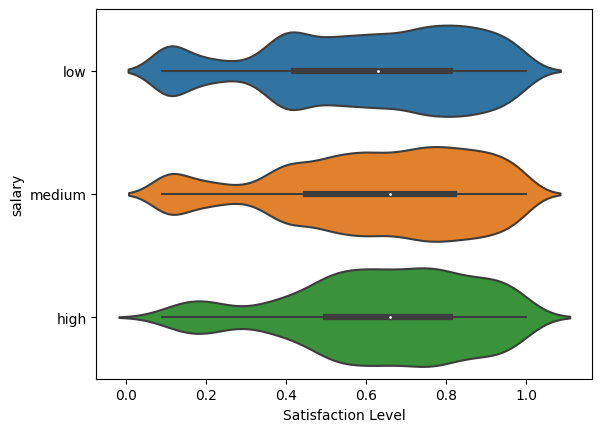

In [9]:
#kde Plot
sns.violinplot(y=df['salary'], x=df['Satisfaction Level'])

In [10]:
df.columns

Index(['Satisfaction Level', 'Last Evaluation', 'Number of Projects',
       'Monthly Hours', 'Total Time at the Company', 'Work Accidents',
       'Quit the Company', 'Promoted in Last 5 yrs', 'Departments', 'salary',
       'Management'],
      dtype='object')

In [11]:
#dummies 
#df = pd.get_dummies(df,columns=['Departments'])
df = pd.get_dummies(df, columns=['Departments'],dtype=int)
df.head()

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,salary,Management,Departments_IT,Departments_RandD,Departments_accounting,Departments_hr,Departments_management,Departments_marketing,Departments_product_mng,Departments_sales,Departments_support,Departments_technical
0,0.38,0.53,2.0,157,3.0,0.0,1,0,low,31,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5.0,262,6.0,0.0,1,0,medium,71,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7.0,272,4.0,0.0,1,0,medium,8,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5.0,223,5.0,0.0,1,0,low,68,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2.0,159,3.0,0.0,1,0,low,48,0,0,0,0,0,0,0,1,0,0


In [13]:
#label encode to keep the corder, gives us 1,2,3 for salary

label = LabelEncoder()
df['salary'] = label.fit_transform(df[['salary']])
df.head()

C:\Users\senay\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,salary,Management,Departments_IT,Departments_RandD,Departments_accounting,Departments_hr,Departments_management,Departments_marketing,Departments_product_mng,Departments_sales,Departments_support,Departments_technical
0,0.38,0.53,2.0,157,3.0,0.0,1,0,1,31,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5.0,262,6.0,0.0,1,0,2,71,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7.0,272,4.0,0.0,1,0,2,8,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5.0,223,5.0,0.0,1,0,1,68,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2.0,159,3.0,0.0,1,0,1,48,0,0,0,0,0,0,0,1,0,0


####   create x and y for your dependent and independent variable 
#### quit the company is our target

In [14]:
#create x and y for your dependent and independent variable 
X=df.drop('Quit the Company',axis = 1)
#X=df.drop(['Quit the Company','Management'],axis = 1)

#quit the company is our target
y = df['Quit the Company']

#### create the training and test set

In [15]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.7)

#### scale the data

In [16]:
scale = StandardScaler()

X_train_S = scale.fit_transform(X_train)

X_test_S = scale.fit_transform(X_test)

#### build the model

In [17]:
model = LogisticRegression()

#### fit the model to the data

In [19]:
model.fit(X_train, y_train)

C:\Users\senay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_pred = model.predict(X_test)
model.predict_proba(X_test)

array([[0.99634655, 0.00365345],
       [0.        , 1.        ],
       [0.9976421 , 0.0023579 ],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.98899147, 0.01100853]])

In [21]:
accuracy_score(y_test,y_pred)

0.9960952380952381

In [22]:
cross_val_score(model, X_train, y_train, cv = 10, scoring='accuracy')

C:\Users\senay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\senay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.99777778, 0.99777778, 0.99555556, 0.99333333, 0.99333333,
       0.99555556, 0.99777778, 0.99555556, 0.99555556, 1.        ])

In [23]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[8021,    0],
       [  41, 2438]], dtype=int64)

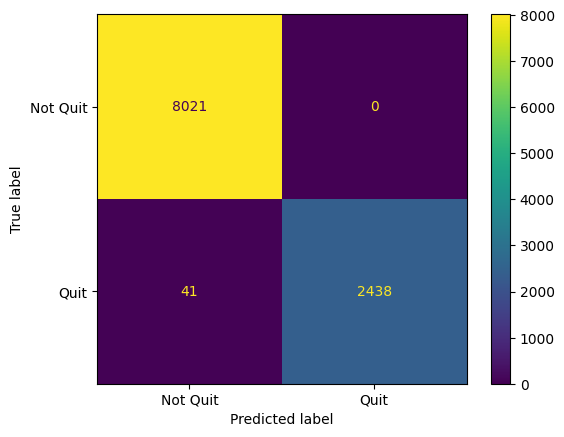

In [24]:
ConfusionMatrixDisplay(cm,display_labels=['Not Quit','Quit']).plot()

In [25]:
pd.DataFrame(zip(X.columns,model.coef_.flatten()),
            columns=['feature','coef']).sort_values(by='coef',ascending=False)

,feature,coef
8,Management,5.708407
10,Departments_RandD,0.894945
11,Departments_accounting,0.299277
4,Total Time at the Company,0.148293
12,Departments_hr,0.110956
3,Monthly Hours,-0.004105
13,Departments_management,-0.084828
15,Departments_product_mng,-0.160449
16,Departments_sales,-0.214644
7,salary,-0.243504
